## Understanding Sentiment Analysis and RNNs
### Sentiment Analysis
Definition:

Sentiment analysis is a technique used to determine the emotional tone behind a piece of text. It identifies whether the sentiment is positive, negative, or neutral.

#### Applications:

- Customer Feedback: Understanding customer opinions about products or services.
- Social Media Monitoring: Gauging public sentiment on social media platforms.
- Market Research: Analyzing consumer preferences and trends.
- Political Analysis: Assessing public opinion on political matters.
- Healthcare: Evaluating patient feedback to improve services.

#### How RNNs Differ from Traditional Feedforward Neural Networks
1) Feedforward Neural Networks (FNNs):
- Data flows in one direction from input to output.
- Suitable for tasks with independent input data, like image classification.
2) Recurrent Neural Networks (RNNs):
- Data flows in a loop, allowing the network to retain memory of previous inputs.
- Ideal for sequential data where inputs are dependent on previous ones, like language processing.

#### Hidden States and Information Passing in RNNs
1) Hidden States: Vectors that store information about previous inputs, acting as the network's memory.
2) Information Passing:
- Initialization: Starts with a zero vector or a learned parameter.
- Update: At each time step, the hidden state is updated based on the current input and the previous hidden state, enabling the network to capture temporal dependencies.

#### Common Issues with RNNs: Vanishing and Exploding Gradients
1) Vanishing Gradients:
- Problem: Gradients become very small, hindering the network's ability to learn long-term dependencies.
- Solution: Use architectures like LSTM or GRU that manage gradients better.

2) Exploding Gradients:
- Problem: Gradients become too large, causing instability.
- Solution: Apply gradient clipping to limit gradient values.

By addressing these issues, RNNs can effectively learn from sequential data, making them powerful for tasks like sentiment analysis and language modeling.

In [10]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [1]:
# Parameters
max_features = 10000  # Top most frequent words to consider
maxlen = 500  # Max sequence length
batch_size = 64
embedding_dims = 32
epochs = 10

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [2]:
# Pad sequences
print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [3]:
# Define the model architecture
# model = Sequential()
# model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(32, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(16))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

c:\Users\annma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from tensorflow.keras.optimizers import Adam

# Function to create LSTM model
def create_lstm_model(lstm_layers=3, lstm_units=[64, 32, 16], dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
    
    for i, units in enumerate(lstm_units):
        return_sequences = i < len(lstm_units) - 1
        model.add(LSTM(units, return_sequences=return_sequences))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [4]:
model = create_lstm_model()

In [5]:
print(f"x_train shape: {len(x_train)}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {len(x_test)}")
print(f"y_test shape: {y_test.shape}")

x_train shape: 25000
y_train shape: (25000,)
x_test shape: 25000
y_test shape: (25000,)


In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# Monitor the training process
print(history.history.keys())

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 386s 1s/step - accuracy: 0.5082 - loss: 0.6959 - val_accuracy: 0.7606 - val_loss: 0.5224
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.7833 - loss: 0.4804 - val_accuracy: 0.8242 - val_loss: 0.3888
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8945s 29s/step - accuracy: 0.8732 - loss: 0.3181 - val_accuracy: 0.8538 - val_loss: 0.3358
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1603s 5s/step - accuracy: 0.9088 - loss: 0.2452 - val_accuracy: 0.8498 - val_loss: 0.3511
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.9324 - loss: 0.1956 - val_accuracy: 0.8738 - val_loss: 0.3357
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 453s 1s/step - accuracy: 0.9479 - loss: 0.1527 - val_accuracy: 0.8630 - val_loss: 0.3367
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.9569 - loss: 0.1320 - val_accuracy: 0.8258 - val_loss: 0.4396
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 519s 2s/step - accuracy: 0.9581 - loss: 0.1261 - val_a

In [7]:
# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

391/391 ━━━━━━━━━━━━━━━━━━━━ 215s 550ms/step - accuracy: 0.8627 - loss: 0.3628
Test score: 0.35405421257019043
Test accuracy: 0.8650400042533875


In [8]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

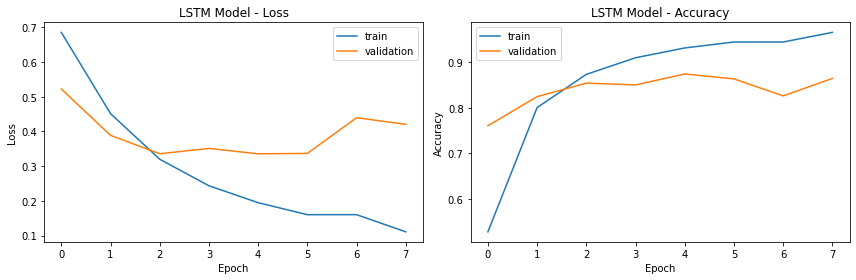

In [11]:
plot_history(history, 'LSTM Model')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Hyperparameter tuning for LSTM
param_dist = {
   # 'lstm_layers': [2, 3, 4],
    'lstm_units': [[32, 16], [64, 32, 16], [128, 64, 32, 16]],
    'dropout_rate': [0.1, 0.2, 0.3],
    'learning_rate': [0.0001, 0.001, 0.01]
}

lstm_tuner = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=batch_size, verbose=0)
random_search = RandomizedSearchCV(estimator=lstm_tuner, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1)
random_search.fit(x_train, y_train)

print("Best LSTM parameters:", random_search.best_params_)
print("Best LSTM accuracy:", random_search.best_score_)

In [ ]:
random_search.best_estimator_.model.save('best_lstm_model.h5')

In [ ]:
# Train the best model
best_model = random_search.best_estimator_.model
best_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])

In [ ]:
# Evaluate the model
tuning_score, tuning_acc = best_model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', tuning_score)
print('Test accuracy:', tuning_acc)

In [ ]:
# Function to create feedforward NN model
def create_ffnn_model(dense_layers=3, dense_units=[64, 32, 16], dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
    model.add(Flatten())
    
    for units in dense_units:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Train and evaluate feedforward NN model
ffnn_model = create_ffnn_model()
ffnn_history = ffnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                              validation_split=0.2, callbacks=[early_stopping])

In [ ]:
ffnn_score, ffnn_acc = ffnn_model.evaluate(x_test, y_test, batch_size=batch_size)
print('FFNN Test score:', ffnn_score)
print('FFNN Test accuracy:', ffnn_acc)

In [ ]:
plot_history(ffnn_history, 'Feedforward NN Model')

In [ ]:
# Comparative analysis
print("\nComparative Analysis:")
print(f"LSTM Accuracy: {acc:.4f}")
print(f"FFNN Accuracy: {ffnn_acc:.4f}")
print(f"Accuracy Difference: {abs(acc - ffnn_acc):.4f}")

In [ ]:
if acc > ffnn_acc:
    print("The LSTM model outperformed the Feedforward NN model.")
elif ffnn_acc > acc:
    print("The Feedforward NN model outperformed the LSTM model.")
else:
    print("Both models performed equally well.")